# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the libraries you will be using for analysis
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [545]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [546]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [547]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('D:/UpGrad/Graded Assignment/NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
# initialised the year as I can see that there are some data of 2008 and 2009 as well in the 2023-1.parquet file which I imported earlier.
year = 2023

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df1 = pd.read_parquet(file_path)
        filtering the data based on the year
        df1 = df1[df1['tpep_pickup_datetime'].dt.year == year]
        #Extracting pickup date and hour for the sampling
        df1['date_data'] = df1['tpep_pickup_datetime'].dt.date
        df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        

        # Loop through dates and then loop through every hour of each date
        for date, df_day in df1.groupby('date_data'):
            # Iterate through each hour of the selected date
            for hour, df_hour in df_day.groupby('pickup_hour'):
                
                # Sample 5% of the hourly data randomly
                sample = df_hour.sample(frac = 0.0079, random_state=42)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data,sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data], ignore_index = True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_csv('NYC_trip_records.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file
df = pd.read_csv('NYC_trip_records.csv')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [10]:
# Fix the index and drop any columns that are not needed
df = df.drop(columns = df.columns[0],axis=1) #dropped the first column
df = df.drop(['date_data','store_and_fwd_flag'],axis=1) # dropped 2 more columns as these are not needed in further analysis

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df['Airport_fee']= df[['airport_fee','Airport_fee']].sum(axis=1)

In [13]:
#dropped one of the airport_fee as we have already combined the fees and summed up the values in one of the columns
df = df.drop(columns='airport_fee',axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
negative_values = df[df.fare_amount <0]
negative_values

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
#There is no negative fare amount and hence no relation of the negative fare amount and RatecodeID in the above records.

In [ ]:
# Analyse RatecodeID for the negative fare amounts

#There is no negative fare amount in the data

In [16]:
# Find which columns have negative values
negative_value_col = []
for column in df.columns:
    if (df[column].dtypes) != 'object':
        if(df[column]<0).any():
            negative_value_col.append(column)
negative_value_col

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [17]:
# fix these negative values
rows_to_drop = df[(df[negative_value_col] < 0).any(axis=1)].index
#dropped the rows with the negative values
df_non_negative = df.drop(index=rows_to_drop).reset_index(drop=True)
df_non_negative

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...          ...                  ...                   ...              ...   
299648         2  2023-09-30 23:46:50   2023-09-30 23:59:34              1.0   
299649         1  2023-09-30 23:23:20   2023-09-30 23:37:54              1.0   
299650         1  2023-09-30 23:45:31   2023-10-01 00:19:15              1.0   
299651         1  2023-09-30 23:15:39   2023-09-30 23:25:12              3.0   
299652         2  2023-09-30 23:11:16   2023-09-30 23:27:54              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                7.74         1.0           138           256             2   
1                1.24         1.0           161           237             1   
2                1.44         1.0           237           141             2   
3                0.54         1.0           143           142             2   
4               19.24         NaN            66           107             0   
...               ...         ...           ...           ...           ...   
299648           1.91         1.0            79           231             1   
299649           2.50         1.0           249            48             1   
299650           3.90         1.0           186           263             1   
299651           1.20         1.0           114            79             1   
299652           1.76         1.0           249           234             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             32.40    6.0      0.5        0.00           0.0   
1              7.90    1.0      0.5        2.58           0.0   
2             11.40    1.0      0.5        0.00           0.0   
3              6.50    1.0      0.5        0.00           0.0   
4             25.64    0.0      0.5        5.93           0.0   
...             ...    ...      ...         ...           ...   
299648        12.80    1.0      0.5        3.56           0.0   
299649        15.60    3.5      0.5        2.50           0.0   
299650        30.30    3.5      0.5        5.00           0.0   
299651        10.00    3.5      0.5        0.00           0.0   
299652        15.60    1.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
299648                    1.0         21.36                   2.5   
299649                    1.0         23.10                   2.5   
299650                    1.0         40.30                   2.5   
299651                    1.0         15.00                   2.5   
299652                    1.0         20.60                   2.5   

        pickup_hour  Airport_fee  
0                 0         1.25  
1                 0         0.00  
2                 0         0.00  
3                 0         0.00  
4                 0         0.00  
...             ...          ...  
299648           23         0.00  
299649           23         0.00  
299650           23         0.00  
299651           23         0.00  
299652           23         0.00  

[299653 rows x 19 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column


In [18]:
# Find the proportion of missing values in each column
missing_value_proportion =(df_non_negative.isnull().sum()/len(df_non_negative)) * 100
missing_value_proportion

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.357217
trip_distance            0.000000
RatecodeID               3.357217
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.357217
pickup_hour              0.000000
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [27]:
# Display the rows with null values
df_non_negative[df_non_negative.passenger_count.isnull()]
# Impute NaN values in 'passenger_count'
df_non_negative['passenger_count'] = df_non_negative['passenger_count'].fillna(df_non_negative['passenger_count'].mode()[0])

Did you find zeroes in passenger_count? Handle these.

In [28]:
#Replaced all the zeroes with the mode value in the passenger_count.
mode_value = df_non_negative['passenger_count'].mode()[0]
df_non_negative['passenger_count'] = df_non_negative['passenger_count'].replace(0,mode_value)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [29]:
# Fix missing values in 'RatecodeID'
df_non_negative['RatecodeID'] = df_non_negative['RatecodeID'].fillna(df_non_negative['RatecodeID'].median())

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [33]:
# handle null values in congestion_surcharge
surcharge_mode = df_non_negative['congestion_surcharge'].mode()[0]
df_non_negative['congestion_surcharge'] = df_non_negative['congestion_surcharge'].fillna(surcharge_mode)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.
<br><br>
Answer - No there are no other NaN values in other columns.

In [34]:
#Checking for missing values in other columns
df_non_negative.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_hour              0
Airport_fee              0
dtype: int64

In [ ]:
# Handle any remaining missing values
#There are none

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [36]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_non_negative.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  299653.000000    299653.000000  299653.000000  299653.000000   
mean        1.733759         1.370405       3.561655       1.629905   
std         0.447470         0.863420      45.766470       7.380254   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299653.000000  299653.000000  299653.000000  299653.000000   
mean      165.239597     163.918402       1.164744      20.292538   
std        64.053485      69.795465       0.507158     262.125469   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000  143163.450000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299653.000000  299653.000000  299653.000000  299653.000000   
mean        1.585264       0.495378       3.544530       0.591435   
std         1.823521       0.047924       4.049036       2.174602   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299653.000000  299653.000000         299653.000000   
mean                0.999062      29.346631              2.315286   
std                 0.028163     262.471350              0.653962   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000  143167.450000              2.500000   

         pickup_hour    Airport_fee  
count  299653.000000  299653.000000  
mean       14.263835       0.137493  
std         5.807910       0.456518  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

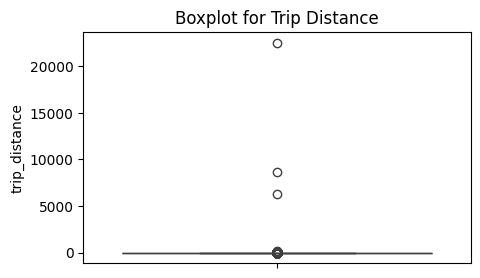

In [37]:
#Outlier analysis for Trip distance as there are some extreme values
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.trip_distance)
plt.xticks(rotation=90)
plt.title("Boxplot for Trip Distance")
plt.show()

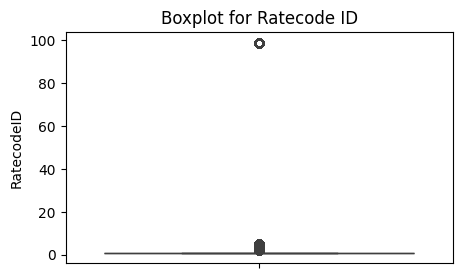

In [38]:
#Outlier analysis for Ratecode ID
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.RatecodeID)
plt.xticks(rotation=90)
plt.title("Boxplot for Ratecode ID")
plt.show()

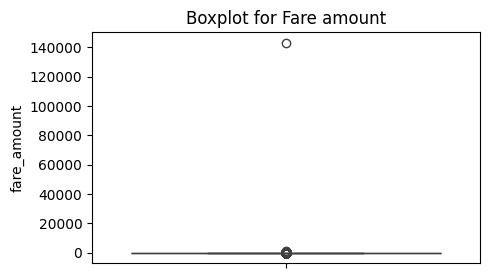

In [39]:
#Outlier analysis on Fare amount
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.fare_amount)
plt.title("Boxplot for Fare amount")
plt.show()

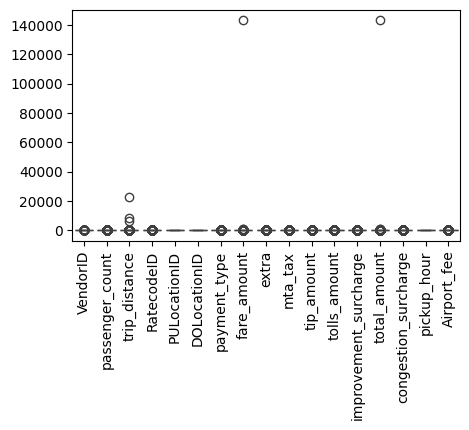

In [40]:
#outlier analysis on the whole dataframe
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative)
plt.xticks(rotation=90)
plt.show()

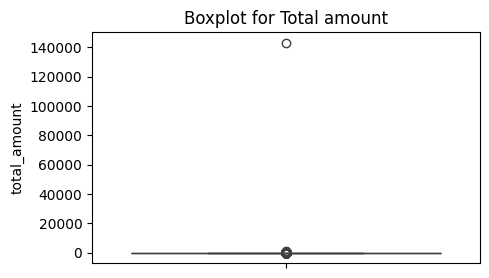

In [41]:
#Outlier analysis of total amount
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.total_amount)
plt.title("Boxplot for Total amount")
plt.show()

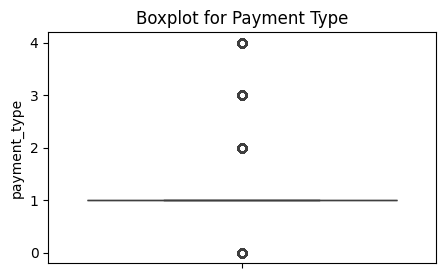

In [42]:
#Outlier analysis for payment type
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.payment_type)
plt.xticks(rotation=90)
plt.title("Boxplot for Payment Type")
plt.show()

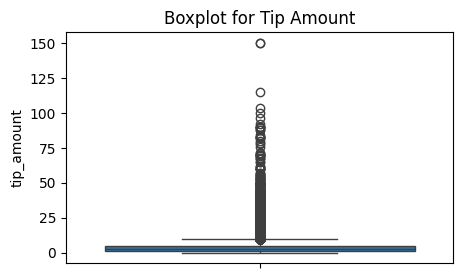

In [43]:
#Outlier analysis for Tip amount
plt.figure(figsize=(5,3))
sns.boxplot(data=df_non_negative.tip_amount)
plt.xticks(rotation=90)
plt.title("Boxplot for Tip Amount")
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?
<br><br>
Answer - In addition to the above mentioned points in the notebook, I will follow the mentioned steps.
1. Replace the value 99 with the mode in RatecodeID as 99 is not a valid category.
2. Remove the extreme values above upper bound from fare amount, total amount, trip distance and tip amount by calculating the Interquartile range

First, let us remove 7+ passenger counts as there are very less instances.

In [44]:
# remove passenger_count > 6
pcount_above6 = df_non_negative[df_non_negative['passenger_count'] > 6].index
df_cleaned = df_non_negative.drop(index = pcount_above6).reset_index(drop = True)

In [45]:
# Continue with outlier handling

In [46]:
#dropped the rows where trip distance was less than 1 mile and fare amount was more than 300
df_outlier1 = df_cleaned[(df_cleaned['trip_distance'] < 1) & (df_cleaned['fare_amount'] > 300)].index
df_cleaned1 = df_cleaned.drop(df_outlier1).reset_index(drop = True)

In [47]:
#dropped the rows where trip distance and fare amount were 0 and pickup and drop location were not same, as these are most likely incorrect trip records
df_outlier2 = df_cleaned1[(df_cleaned1['trip_distance']==0) & (df_cleaned1['fare_amount'] == 0) & (df_cleaned1['PULocationID'] != df_cleaned1['DOLocationID'])].index
df_cleaned2 = df_cleaned1.drop(df_outlier2).reset_index(drop=True)

In [48]:
#dropped the rows with trip distance more than 250 miles as it is most unlikely in a city ride dataset
df_outlier3 = df_cleaned2[df_cleaned2['trip_distance'] > 250].index
df_cleaned3 = df_cleaned2.drop(df_outlier3).reset_index(drop=True)

In [49]:
#Replaced the payment type 0 to 5 (unknown payment type) as 0 is not the valid category.
df_cleaned3['payment_type'] = df_cleaned3['payment_type'].replace(0,5)

In [50]:
#Replaced 99 under RatecodeID with the most occuring one (mode)
rate_mode = df_cleaned3.RatecodeID.mode()[0]
df_cleaned3['RatecodeID'] = df_cleaned3['RatecodeID'].replace(99,rate_mode)

In [ ]:
# Outlier handing of fare amount, total amount, trip distance and tip amount

In [94]:
#Calculated 25th percentile of the fare amount, total amount, trip distance and tip amount
Q1 = df_cleaned3[['fare_amount','total_amount','trip_distance','tip_amount',]].quantile(0.25)
Q3 = df_cleaned3[['fare_amount','total_amount','trip_distance','tip_amount',]].quantile(0.75)

In [95]:
#Calculated the InterQuartile Range for the above mentioned columns
IQR = Q3-Q1

In [96]:
#Calculated the lower bound as well as the upper bound to check the Outlier Threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [98]:
#Removed the outliers more than the thresholds
df_final = df_cleaned3[~(
    (df_cleaned3['fare_amount']>upper_bound['fare_amount']) |
    (df_cleaned3['total_amount']>upper_bound['total_amount']) |
    (df_cleaned3['trip_distance']>upper_bound['trip_distance']) |
    (df_cleaned3['tip_amount']>upper_bound['tip_amount']) 

)]

In [99]:
# Do any columns need standardising?
'No'

'No'

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [100]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Datetime
* `tpep_dropoff_datetime`: Datetime
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?
<br>The monetory parameters belong to the Numerical category

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [101]:
# Find and show the hourly trends in taxi pickups

In [102]:
#Created a hourly_pickup df to analyse the distribution of taxi pickups by hours
hourly_pickup = df_final['pickup_hour'].value_counts().sort_index().reset_index()
hourly_pickup

pickup_hour  count
0             0   7081
1             1   5006
2             2   3358
3             3   2164
4             4   1250
5             5   1080
6             6   3140
7             7   6940
8             8   9939
9             9  11156
10           10  12102
11           11  13072
12           12  14131
13           13  14368
14           14  15241
15           15  15640
16           16  15653
17           17  17557
18           18  18809
19           19  16532
20           20  14603
21           21  14602
22           22  13229
23           23  10154

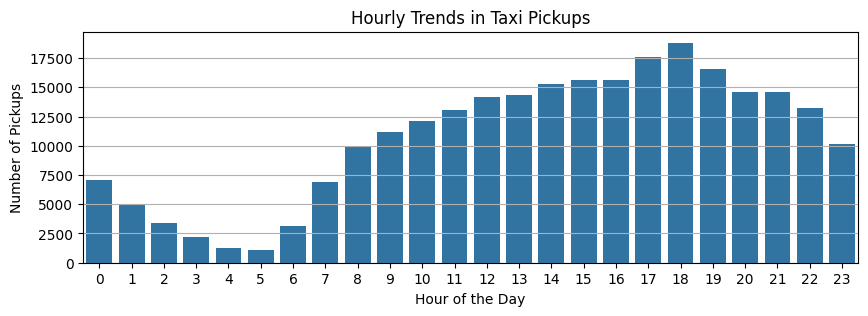

In [103]:
#Barplot showing Hourly Trends in Taxi Pickups
plt.figure(figsize=(10,3))
sns.barplot(data = hourly_pickup, x = 'pickup_hour',y='count')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.grid(visible = True, axis = 'y')
plt.title('Hourly Trends in Taxi Pickups')
plt.show()

In [76]:
# Find and show the daily trends in taxi pickups (days of the week)

In [104]:
#Converting the pickup time and drop off time to datetime format
df_final['tpep_pickup_datetime'] = pd.to_datetime(df_final['tpep_pickup_datetime'])
df_final['tpep_dropoff_datetime'] = pd.to_datetime(df_final['tpep_dropoff_datetime'])

In [105]:
#Extracting the Day of the week from the Pickup time
df_final['day_of_week'] = df_final['tpep_pickup_datetime'].dt.day_name()

In [106]:
#Created a df daily_pickup for analysing the daily trend in the taxi pickup
daily_pickup = df_final['day_of_week'].value_counts().reset_index(name='count')
#assigned the column names to the df
daily_pickup.columns = ['day_of_week','count']

In [107]:
#Reordering days for correct sequence
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_pickup['day_of_week'] = pd.Categorical(daily_pickup['day_of_week'],categories = days_order, ordered = True)
daily_pickup.sort_values('day_of_week').reset_index(drop=True)

day_of_week  count
0      Monday  31085
1     Tuesday  37462
2   Wednesday  39653
3    Thursday  40475
4      Friday  38226
5    Saturday  38540
6      Sunday  31366

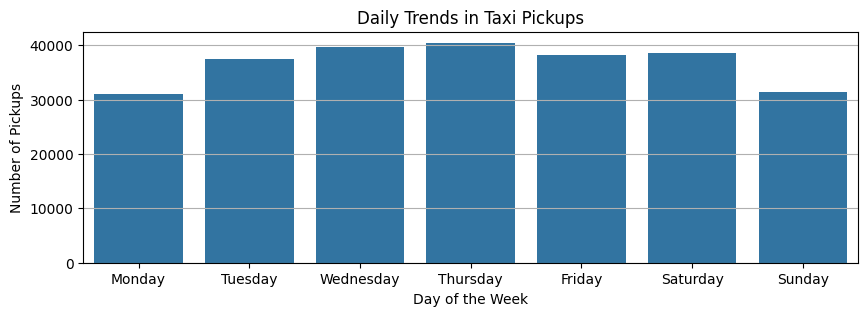

In [108]:
#Barplot showing daily trend in Taxi Pickups
plt.figure(figsize=(10,3))
sns.barplot(data = daily_pickup, x = 'day_of_week',y='count')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(visible = True, axis = 'y')
plt.title('Daily Trends in Taxi Pickups')
plt.show()

In [ ]:
# Show the monthly trends in pickups


In [109]:
#Extracting month name from the pickup timedate series
df_final['month_name'] = df_final['tpep_pickup_datetime'].dt.month_name()
#creating new df monthly_pickup to analyse the trend in the monthly pickups
monthly_pickup = df_final['month_name'].value_counts().reset_index(name='count')
monthly_pickup.columns = ['month_name','count']

In [110]:
#Reordering months for correct sequence
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_pickup['month_name'] = pd.Categorical(monthly_pickup['month_name'],categories = month_order, ordered = True)
monthly_pickup.sort_values('month_name').reset_index(drop=True)

month_name  count
0     January  20804
1    February  19895
2       March  22985
3       April  22097
4         May  23336
5        June  21998
6        July  19334
7      August  18769
8   September  18791
9     October  23480
10   November  22555
11   December  22763

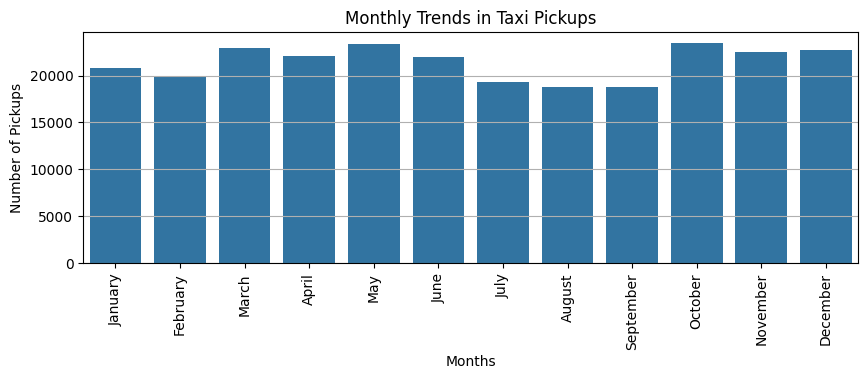

In [111]:
plt.figure(figsize=(10,3))
sns.barplot(data = monthly_pickup, x = 'month_name',y='count')
plt.xlabel('Months')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=90)
plt.grid(visible = True, axis = 'y')
plt.title('Monthly Trends in Taxi Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [114]:
# Analyse the above parameters
#df_final records where fare amount, tip amount, total amount and trip distances are 0
df_final[
            (df_final['fare_amount'] <= 0) &
            (df_final['tip_amount'] <= 0) &
            (df_final['total_amount'] <= 0) &
            (df_final['trip_distance'] <= 0)
]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
491            1  2023-01-01 19:16:54   2023-01-01 19:17:15              1.0   
5742           1  2023-01-09 09:25:20   2023-01-09 09:26:01              1.0   
8546           2  2023-01-12 19:13:41   2023-01-12 19:13:54              1.0   
10494          1  2023-01-14 23:22:45   2023-01-14 23:22:58              1.0   
17238          1  2023-01-23 15:06:45   2023-01-23 15:09:16              1.0   
20191          1  2023-01-27 03:20:13   2023-01-27 03:21:12              1.0   
26649          1  2023-10-04 09:55:14   2023-10-04 09:55:39              1.0   
31187          2  2023-10-09 13:08:37   2023-10-09 13:08:50              1.0   
36514          2  2023-10-15 10:46:22   2023-10-15 10:46:43              1.0   
47411          2  2023-10-27 12:38:27   2023-10-27 12:38:35              1.0   
55485          1  2023-11-05 00:26:50   2023-11-05 00:27:08              1.0   
59361          1  2023-11-09 14:28:17   2023-11-09 14:28:35              1.0   
97983          2  2023-12-22 08:58:22   2023-12-22 08:59:35              1.0   
147990         1  2023-06-20 20:59:38   2023-06-20 20:59:50              1.0   
153884         1  2023-06-27 18:25:48   2023-06-27 18:36:26              1.0   
154550         1  2023-06-28 15:08:48   2023-06-28 15:10:43              1.0   
164359         2  2023-08-11 15:22:03   2023-08-11 15:22:16              1.0   
168372         2  2023-08-17 10:53:49   2023-08-17 10:55:31              1.0   
189588         1  2023-02-14 14:15:54   2023-02-14 14:16:14              6.0   
217841         1  2023-04-20 14:28:46   2023-04-20 14:30:09              1.0   
233851         1  2023-05-08 15:59:36   2023-05-08 16:00:02              1.0   
236218         1  2023-05-11 08:20:40   2023-05-11 08:21:22              1.0   
237210         2  2023-05-12 07:07:13   2023-05-12 07:08:45              1.0   
272176         2  2023-07-25 12:54:18   2023-07-25 12:54:29              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
491               0.0         2.0           261           261             3   
5742              0.0         1.0           145           145             2   
8546              0.0         1.0           264           264             1   
10494             0.0         1.0           132           132             3   
17238             0.0         1.0           132           132             3   
20191             0.0         1.0            45            45             5   
26649             0.0         3.0           234           234             4   
31187             0.0         1.0           264           264             1   
36514             0.0         1.0           193           193             1   
47411             0.0         1.0           193           193             1   
55485             0.0         1.0           233           233             3   
59361             0.0         1.0            79            79             3   
97983             0.0         1.0           264           264             2   
147990            0.0         1.0           164           164             1   
153884            0.0         1.0           247           247             1   
154550            0.0         1.0            66            66             1   
164359            0.0         1.0           264           264             1   
168372            0.0         1.0           264           264             2   
189588            0.0         1.0           145           145             4   
217841            0.0         1.0           151           151             4   
233851            0.0         1.0           145           145             1   
236218            0.0         1.0           145           145             2   
237210            0.0         1.0           264           264             2   
272176            0.0         1.0           264           264             1   

        fare_amount  ...  mta_t

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

<br><br>
Answer - Yes, it would be good to drop these zero values since we are in the financial analysis, and we need the taxis to be in moving state for various analysis. And creating a copy of the dataframe would be good so that we don't make the changes in the ori

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [115]:
# Create a df with non zero entries for the selected parameters.
df_no_zeroes = df_final[
            (df_final['fare_amount'] > 0) &
            (df_final['tip_amount'] > 0) &
            (df_final['total_amount']>0) &
            (df_final['trip_distance'] > 0)
].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [116]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_no_zeroes.groupby('month_name', as_index = False)['total_amount'].sum()

In [117]:
#Reordering months for correct sequence
monthly_revenue['month_name'] = pd.Categorical(monthly_revenue['month_name'], categories = month_order, ordered = True)
monthly_revenue = monthly_revenue.sort_values('month_name').reset_index(drop=True)
monthly_revenue

month_name  total_amount
0     January     345524.50
1    February     336179.32
2       March     390158.88
3       April     370747.44
4         May     404485.97
5        June     376866.49
6        July     315946.48
7      August     304188.96
8   September     322175.43
9     October     409233.59
10   November     393755.98
11   December     384797.51

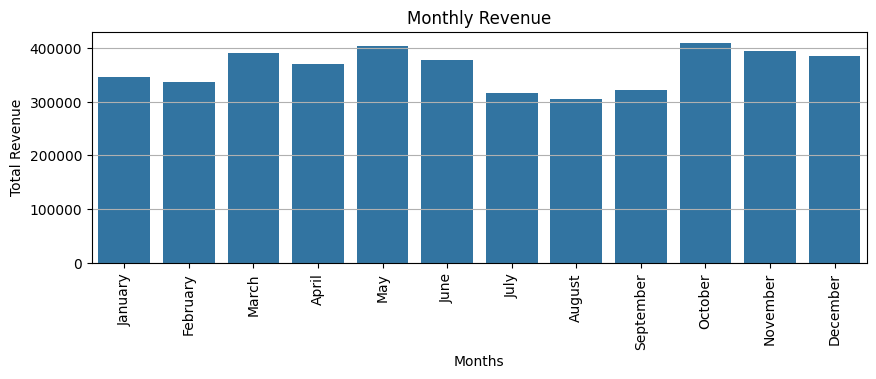

In [118]:
#Boxplot showing Monthly revenue
plt.figure(figsize=(10,3))
sns.barplot(data = monthly_revenue, x = 'month_name',y='total_amount')
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(visible = True, axis = 'y')
plt.title('Monthly Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [119]:
# Calculate proportion of each quarter
#Extracting quarter from the Pickup datetime series
df_no_zeroes['quarter'] = df_no_zeroes['tpep_pickup_datetime'].dt.quarter
#Grouping the quarters to analyse the revenue trend
quarterly_revenue = df_no_zeroes.groupby('quarter',as_index = False)['total_amount'].sum()
#Calculating the revenue proportion for each quarter
quarterly_revenue['revenue_proportion'] = ((quarterly_revenue['total_amount'] * 100) / quarterly_revenue['total_amount'].sum()).round(2)
quarterly_revenue

quarter  total_amount  revenue_proportion
0        1    1071862.70               24.62
1        2    1152099.90               26.46
2        3     942310.87               21.64
3        4    1187787.08               27.28

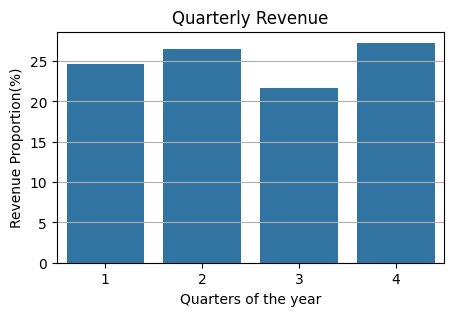

In [120]:
#Boxplot showing Revenue trend Quarterly
plt.figure(figsize=(5,3))
sns.barplot(data = quarterly_revenue, x = 'quarter',y='revenue_proportion')
plt.xlabel('Quarters of the year')
plt.ylabel('Revenue Proportion(%)')
plt.grid(visible = True, axis = 'y')
plt.title('Quarterly Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

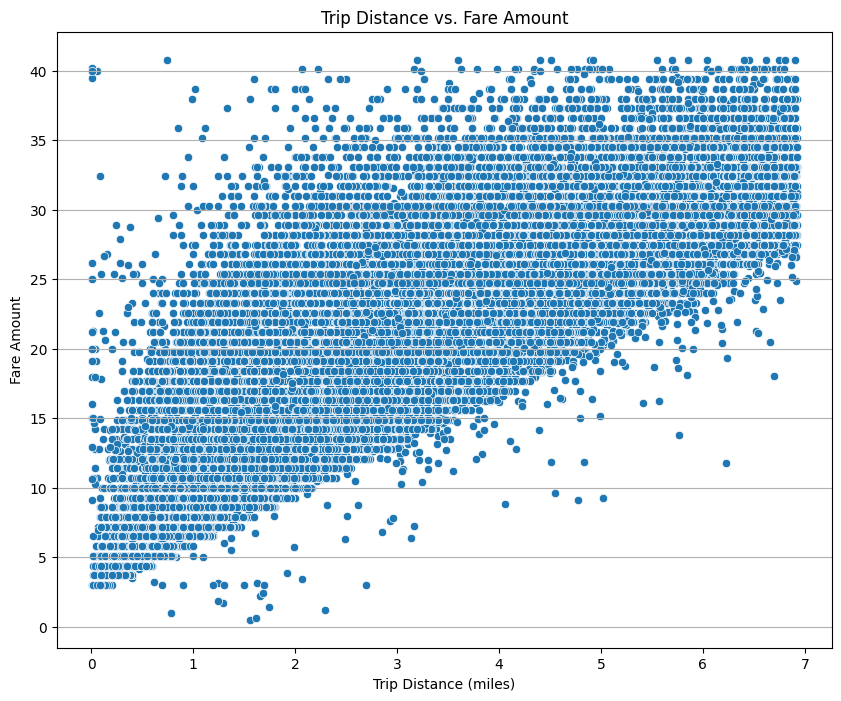

In [121]:
# Show how trip fare is affected by distance
#Scatterplot showing the relationship between trip distance and the fare amount
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_no_zeroes, x = 'trip_distance',y='fare_amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.grid(visible = True, axis = 'y')
plt.title('Trip Distance vs. Fare Amount')
plt.show()

In [122]:
#Calculating the correlation between the trip distance and the fare amount
correlation_matrix = df_no_zeroes[['trip_distance','fare_amount']].corr()
#It shows a strong positive correlation between the trip distance and the fare amount
correlation_matrix

trip_distance  fare_amount
trip_distance       1.000000     0.884736
fare_amount         0.884736     1.000000

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [124]:
# Show relationship between fare and trip duration

In [125]:
#calculating the difference between Pickup and Drop off time.
df_no_zeroes['trip_duration'] = df_no_zeroes['tpep_dropoff_datetime'] - df_no_zeroes['tpep_pickup_datetime']
#Extracting the seconds from the difference of the pickup and dropoff time.
df_no_zeroes['trip_duration'] = df_no_zeroes['trip_duration'].dt.total_seconds()

In [126]:
#duration converted in munites
df_no_zeroes['trip_duration'] = (df_no_zeroes['trip_duration']) / 60 

In [127]:
#duration converted in hours
df_no_zeroes['trip_duration'] = (df_no_zeroes['trip_duration']) / 60 

In [128]:
#Creating a new copy of the df to store only the records where pickup time is less than the dropoff time
df_new = df_no_zeroes[df_no_zeroes['tpep_dropoff_datetime'] > df_no_zeroes['tpep_pickup_datetime']].copy()

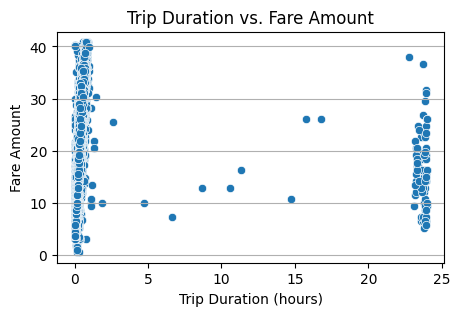

In [129]:
#Scatterplot showing the relation of Trip duration vs the fare amount.
plt.figure(figsize=(5,3))
sns.scatterplot(data = df_new, x = 'trip_duration',y='fare_amount')
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Fare Amount')
plt.grid(visible = True, axis = 'y')
plt.title('Trip Duration vs. Fare Amount')
plt.show()

In [130]:
#Correlation of Trip duration with the fare amount
correlation_matrix = df_new[['trip_duration','fare_amount']].corr()
#Weak positive correlation between trip duration and the fare amount
correlation_matrix

trip_duration  fare_amount
trip_duration       1.000000     0.238883
fare_amount         0.238883     1.000000

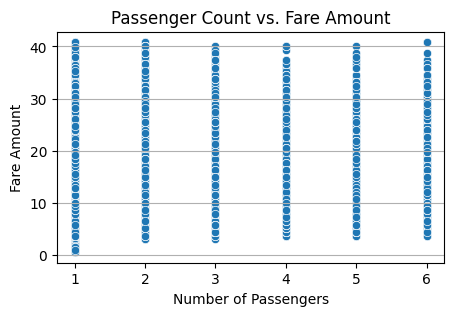

In [131]:
# Show relationship between fare and number of passengers
#Usine scatterplot to show the relation
plt.figure(figsize=(5,3))
sns.scatterplot(data = df_new, x = 'passenger_count',y='fare_amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(visible = True, axis = 'y')
plt.title('Passenger Count vs. Fare Amount')
plt.show()

In [132]:
#Weak correlation between passenger count and fare amount
correlation_matrix = df_new[['passenger_count','fare_amount']].corr()
correlation_matrix

passenger_count  fare_amount
passenger_count         1.000000     0.010658
fare_amount             0.010658     1.000000

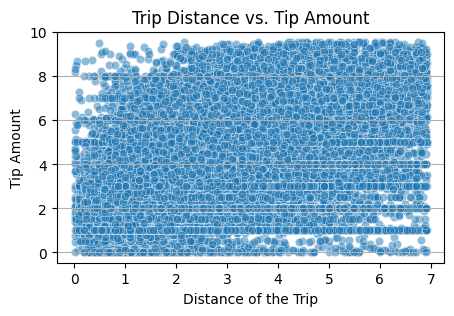

In [133]:
# Show relationship between tip and trip distance
#Using scatterplot
plt.figure(figsize=(5,3))
sns.scatterplot(data = df_new, x = 'trip_distance',y='tip_amount',alpha = 0.5)
plt.xlabel('Distance of the Trip')
plt.ylabel('Tip Amount')
plt.grid(visible = True, axis = 'y')
plt.title('Trip Distance vs. Tip Amount')
plt.show()

In [134]:
#Shows a positive strong correlation between trip distance and tip amount
correlation_matrix = df_new[['trip_distance','tip_amount']].corr()
correlation_matrix

trip_distance  tip_amount
trip_distance        1.00000     0.60921
tip_amount           0.60921     1.00000

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [135]:
# Analyse the distribution of different payment types (payment_type).
#Created valid payment types asked in this question
payment_type_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
#Filtered the data based on the 4 payment types.
df_filtered = df_new[df_new['payment_type'].isin([1,2,3,4])]
#Mapped the payment type with the defined ones in payment_type_mapping
df_filtered['payment_type'] = df_filtered['payment_type'].map(payment_type_mapping)
#Calculated the distribution of the payment types
payment_proportion = (df_filtered['payment_type'].value_counts(normalize=True)) * 100

In [136]:
#We can see that the payment proportion difference is too high between the Credit Card and others
payment_proportion

payment_type
Credit card    99.995341
Cash            0.002588
Dispute         0.001553
No charge       0.000518
Name: proportion, dtype: float64

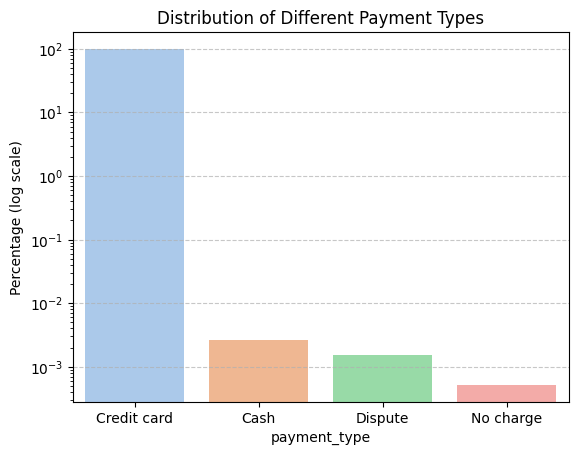

In [137]:
#Barplot showing distribution of different payment types
sns.barplot(x = payment_proportion.index, y = payment_proportion, palette = 'pastel')
#Since the difference was too high, I recorded the percentage in log scale to balance the difference.
plt.yscale('log')
plt.ylabel('Percentage (log scale)')
plt.title('Distribution of Different Payment Types')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.7)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [619]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [139]:
# import geopandas as gpd
import geopandas as gpd
shapefile_name = "D:/UpGrad/Graded Assignment/NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp"
file_path = os.path.join(os.getcwd(),shapefile_name)
# Read the shapefile using geopandas
zones = gpd.read_file(file_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

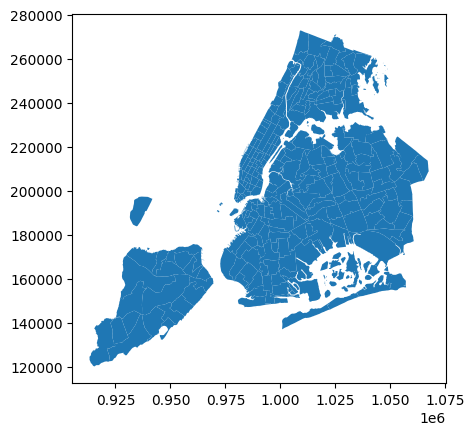

In [140]:
#print(zones.info())
#zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [141]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df_new.merge(zones, left_on = 'PULocationID',right_on = 'LocationID', how = 'left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [142]:
# Group data by location and calculate the number of trips
trip_counts = df_merged.groupby('LocationID').size().reset_index(name = 'trip_count')
trip_counts

LocationID  trip_count
0           4.0         238
1           7.0          46
2          10.0           2
3          12.0          61
4          13.0        1147
..          ...         ...
138       258.0           1
139       260.0          10
140       261.0         984
141       262.0        2985
142       263.0        4255

[143 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [143]:
# Merge trip counts back to the zones GeoDataFrame
df_merged_zones = zones.merge(trip_counts, on = 'LocationID', how = 'left')

In [144]:
#Filling up the Nan values with 0
df_merged_zones['trip_count'].fillna(0,inplace=True)

In [145]:
df_merged_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   trip_count  263 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

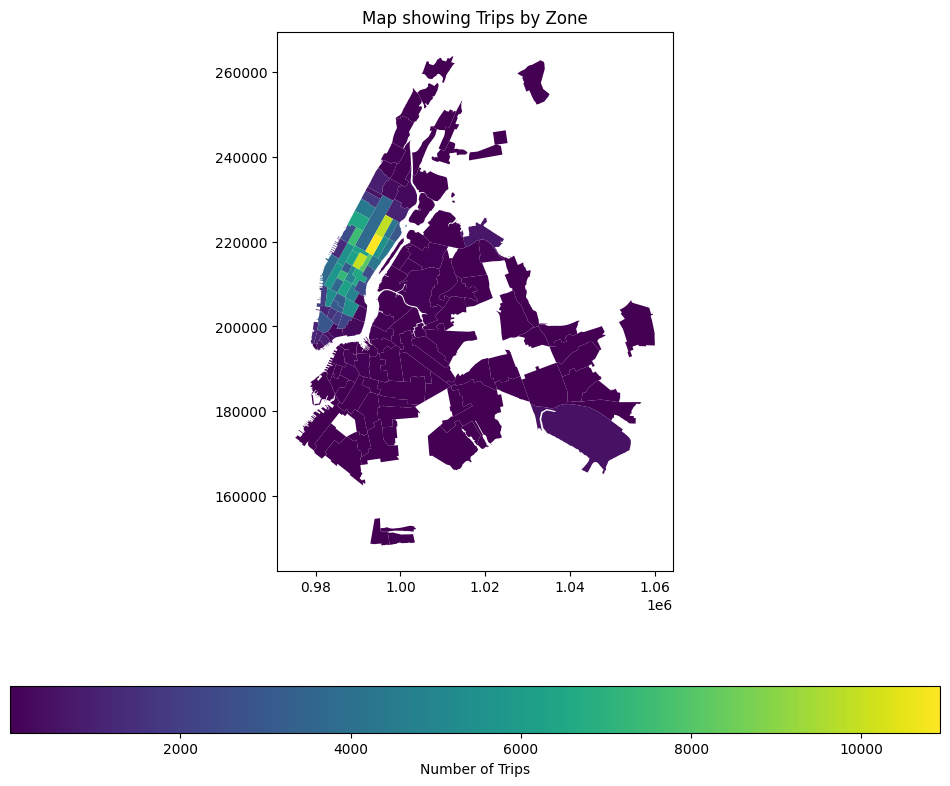

In [146]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
#filtering the zones where trip_count is 0
filtered_zones = df_merged_zones[df_merged_zones['trip_count'] > 0]
# Plot the map and display it
filtered_zones.plot(
column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "Number of Trips", 'orientation': "horizontal"}
    
)
plt.title('Map showing Trips by Zone')
plt.show()

In [ ]:
#zones_sorted.reset_index(drop=True)

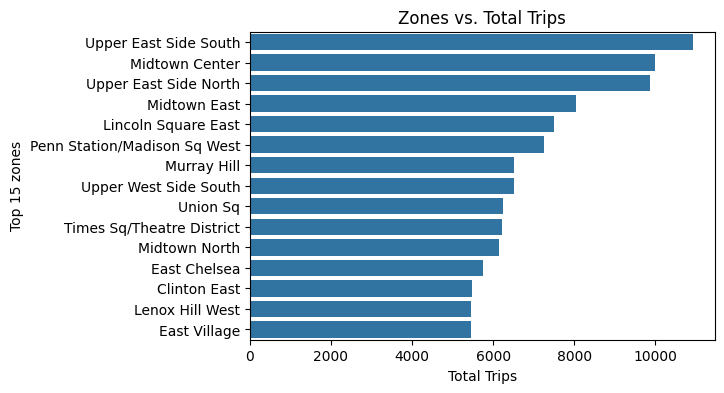

In [148]:
# can you try displaying the zones DF sorted by the number of trips?
#created a new df to capture the zones sorted on the basis of the trip_count
zones_sorted = filtered_zones.sort_values(by = 'trip_count',ascending = False).head(15)
plt.figure(figsize=(6,4))
plt.xlabel('Total Trips')
plt.ylabel('Top 15 zones')
plt.title('Zones vs. Total Trips')
sns.barplot(x = zones_sorted['trip_count'],y = zones_sorted['zone'])
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [149]:
# Find routes which have the slowest speeds at different times of the day
#Creating pivot table for aggregating pickup hour
pivot_route_hourly_data = df_new.pivot_table(
        values=['trip_duration','trip_distance'],
        index = ['PULocationID','DOLocationID'],
        columns = ['pickup_hour'],
        aggfunc = 'mean'
)

In [150]:
#Calculating speed pivot based on the trip distance and duration
speed_pivot = pivot_route_hourly_data['trip_distance']/pivot_route_hourly_data['trip_duration']

In [151]:
#Calculating top 20 slowest routes
slowest_routes = speed_pivot.min(axis=1).sort_values().head(20)

In [155]:
slowest_routes.reset_index()

PULocationID  DOLocationID         0
0            113           113  0.016401
1            209           232  0.043579
2            164           100  0.067827
3            209            25  0.106057
4             41            41  0.112527
5            234           256  0.135555
6            163            87  0.140078
7            229            41  0.174780
8            229           145  0.203877
9            144           100  0.233282
10           113           224  0.234732
11           148           238  0.253430
12           162           114  0.258511
13           107           148  0.263509
14           125           161  0.271317
15           230            48  0.276854
16           261           237  0.280904
17            97            97  0.300000
18           211           246  0.322012
19           151           163  0.330591

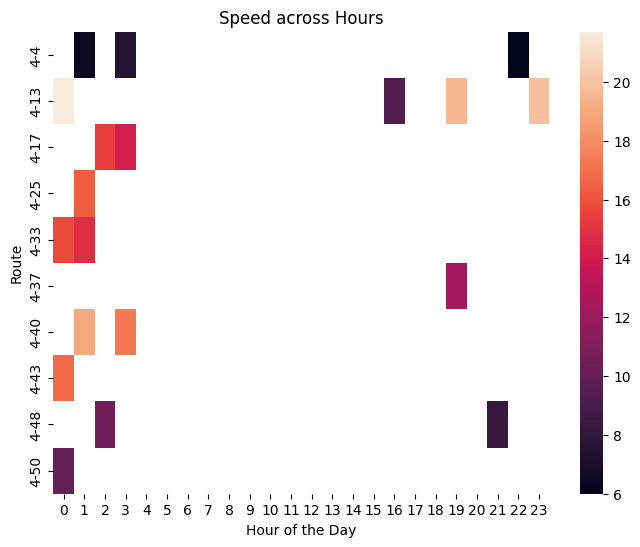

In [158]:
#Plotting heatmap to see the slowest routes
plt.figure(figsize=(8,6))
sns.heatmap(speed_pivot.head(10))
plt.xlabel('Hour of the Day')
plt.ylabel('Route')
plt.title('Speed across Hours')
plt.show()

How does identifying high-traffic, high-demand routes help us

Answer - With the help of the real time data, we can try avoiding the high-traffic routes, so that the passengers don't feel frustrated and we completed our trip on time.
For High demand routes, if we shift our cabs there for car pooling, means for multiple passengers, we can have a profit as well.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [159]:
# Visualise the number of trips per hour and find the busiest hour
#calculate the hourly trips
trips_per_hour = df_new['pickup_hour'].value_counts().sort_index()

pickup_hour
0      5518
1      3898
2      2518
3      1562
4       773
5       662
6      2277
7      5373
8      7845
9      8614
10     9054
11     9698
12    10468
13    10570
14    11372
15    11735
16    11849
17    13778
18    14983
19    13164
20    11699
21    11811
22    10672
23     7955
Name: count, dtype: int64

In [160]:
#capture the index of the busiest hour, which is the hour itself
busiest_hour = trips_per_hour.idxmax()
#capture the value of the busiest hour, which is the number of trips
busiest_trip = trips_per_hour.max()

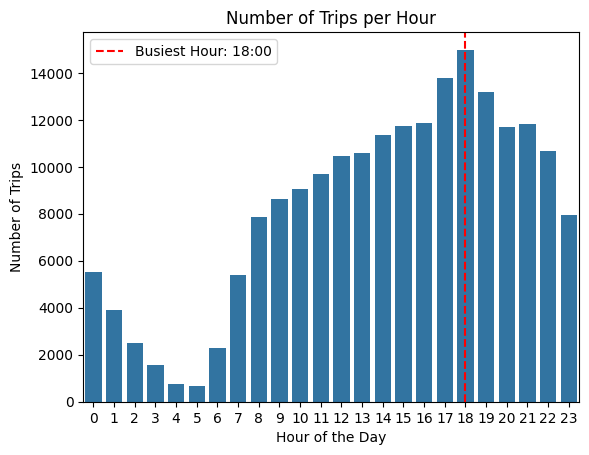

In [164]:
#Barplot showing the hourly trips
sns.barplot(x = trips_per_hour.index,y = trips_per_hour.values)
plt.axvline(x = busiest_hour, color  = 'red',linestyle='--',label = f"Busiest Hour: {busiest_hour}:00")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(0,24))
plt.legend()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [165]:
#Sort the values of the busiest trips and take top 5
top_5_busiest_hour = trips_per_hour.sort_values(ascending=False).head(5)

In [166]:
# Scale up the number of trips
sampling_frac = 0.0079
# Fill in the value of your sampling fraction and use that to scale up the numbers
scaled_trips = top_5_busiest_hour / sampling_frac
scaled_trips.astype(int)

pickup_hour
18    1896582
17    1744050
19    1666329
16    1499873
21    1495063
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [167]:
# Compare traffic trends for the week days and weekends
#Categorizing the days of the week in the weekend and Weekdasy for further analysis
df_new['day_type'] = df_new['day_of_week'].apply(lambda x: 'Weekend' if x in 'Saturday' or x in 'Sunday' else 'Weekday')

In [168]:
#Making a df of the hourly trips
hourly_trips = df_new.groupby(['day_type','pickup_hour']).size().unstack(0)

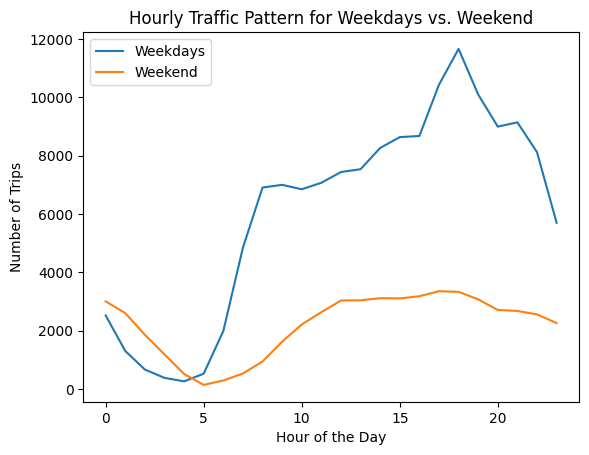

In [169]:
#Lineplot showing Hourly traffic for Weekdays and Weekends
sns.lineplot(x=hourly_trips.index,y=hourly_trips['Weekday'], label = 'Weekdays')
sns.lineplot(x=hourly_trips.index,y=hourly_trips['Weekend'], label = 'Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern for Weekdays vs. Weekend')
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Answer - More cabs can be dispatched to targeted locations in the busiest hours to reduce passenger wait times, and grow more revenue.
During quiet hours, fewer cabs can operate, which can reduce operational cost.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [170]:
# Find top 10 pickup and dropoff zones
top_pick_zones = df_new['PULocationID'].value_counts().head(10)
top_dropoff_zones = df_new['DOLocationID'].value_counts().head(10)

In [171]:
#Calculating hourly trend for the top pickup and drop off zones by grouping the pickup hour and pickupid/dropoff id
pickup_hourly_trend = df_new[df_new['PULocationID'].isin(top_pick_zones.index)].groupby(['pickup_hour','PULocationID']).size().unstack()
dropoff_hourly_trend = df_new[df_new['DOLocationID'].isin(top_dropoff_zones.index)].groupby(['pickup_hour','DOLocationID']).size().unstack()

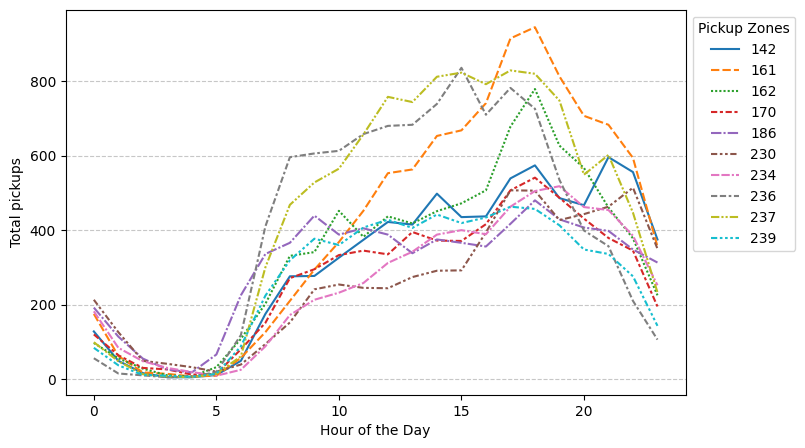

In [172]:
#Lineplot showing top 10 pickup zones
plt.figure(figsize=(8,5))
sns.lineplot(data = pickup_hourly_trend)
plt.xlabel('Hour of the Day')
plt.ylabel('Total pickups')
plt.legend(title = 'Pickup Zones',bbox_to_anchor = (1,1))
plt.grid(visible = True, axis = 'y',linestyle = '--',alpha = 0.7)
plt.show()

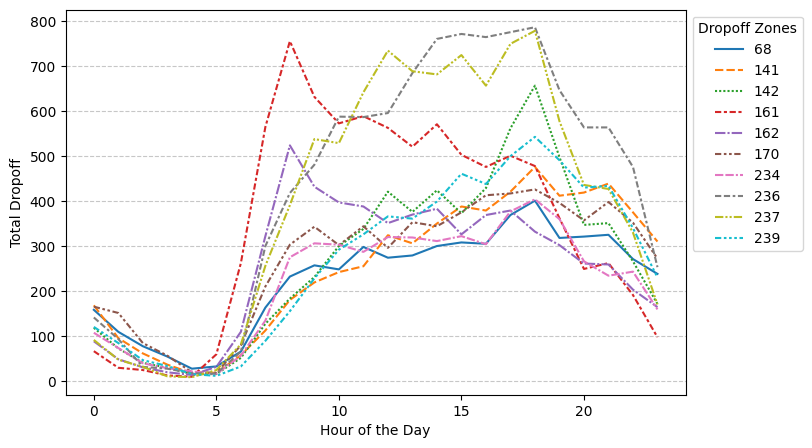

In [173]:
#Lineplot showing top 10 dropoff zones
plt.figure(figsize=(8,5))
sns.lineplot(data = dropoff_hourly_trend)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Dropoff')
plt.legend(title = 'Dropoff Zones',bbox_to_anchor = (1,1))
plt.grid(visible = True, axis = 'y',linestyle = '--',alpha = 0.7)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [174]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_new['PULocationID'].value_counts()
dropoff_counts = df_new['DOLocationID'].value_counts()

In [175]:
#Creating a df capturing the pickup and dropoff counts
zone_ratio = pd.DataFrame({'Pickups':pickup_counts, 'Dropoffs':dropoff_counts})
#Rows where there is no pickup of dropoff location is mentioned, will be replaced with 1
zone_ratio.fillna(1,inplace=True)
#Calculating the ratio
zone_ratio['Pickup/Dropoff Ratio'] = zone_ratio['Pickups']/zone_ratio['Dropoffs']

In [176]:
#Calculating the highest and lowest ratio
highest_ratio = zone_ratio.sort_values(by='Pickup/Dropoff Ratio',ascending=False).head(10)
lowest_ratio = zone_ratio.sort_values(by='Pickup/Dropoff Ratio',ascending=True).head(10)

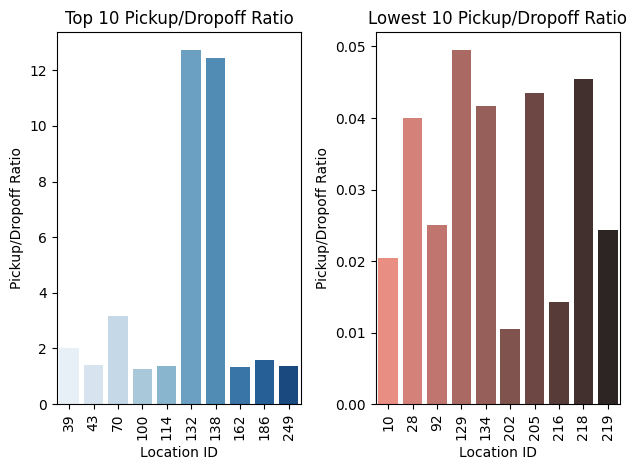

In [177]:
#Barplot for Top 10 Pickups
plt.subplot(1,2,1)
sns.barplot(x=highest_ratio.index,y=highest_ratio['Pickup/Dropoff Ratio'],palette = 'Blues')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Top 10 Pickup/Dropoff Ratio')


#Barplot for Bottom 10 Pickups
plt.subplot(1,2,2)
sns.barplot(x=lowest_ratio.index,y=lowest_ratio['Pickup/Dropoff Ratio'],palette = 'dark:salmon_r')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Lowest 10 Pickup/Dropoff Ratio')

plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [178]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


In [ ]:
#Define the night hours
night_hours = df_new[(df_new['pickup_hour']>23) | (df_new['pickup_hour']>=23) | (df_new['pickup_hour']<=5)]

In [179]:
#Pickup and dropoff counts for night hours
night_pickup_counts = night_hours['PULocationID'].value_counts()
night_dropoff_counts = night_hours['DOLocationID'].value_counts()

In [180]:
#Creating a dataframe to capture the pickup and dropoff counts at night time
night_traffic_zones = pd.DataFrame({'Pickups':night_pickup_counts,'Dropoffs':night_dropoff_counts})
night_traffic_zones.fillna(0,inplace=True)

In [181]:
#Created 2 new df by filtering the top 10 pickup and drop off zones at night time
top_night_pickups = night_traffic_zones.sort_values(by='Pickups',ascending=False).head(10).reset_index()
top_night_pickups.columns = ['Pickup_zone','Pickups', 'Dropoffs']
top_night_dropoffs = night_traffic_zones.sort_values(by='Dropoffs',ascending=False).head(10).reset_index()
top_night_dropoffs.columns = ['Drop_off_zone','Pickups', 'Dropoffs']

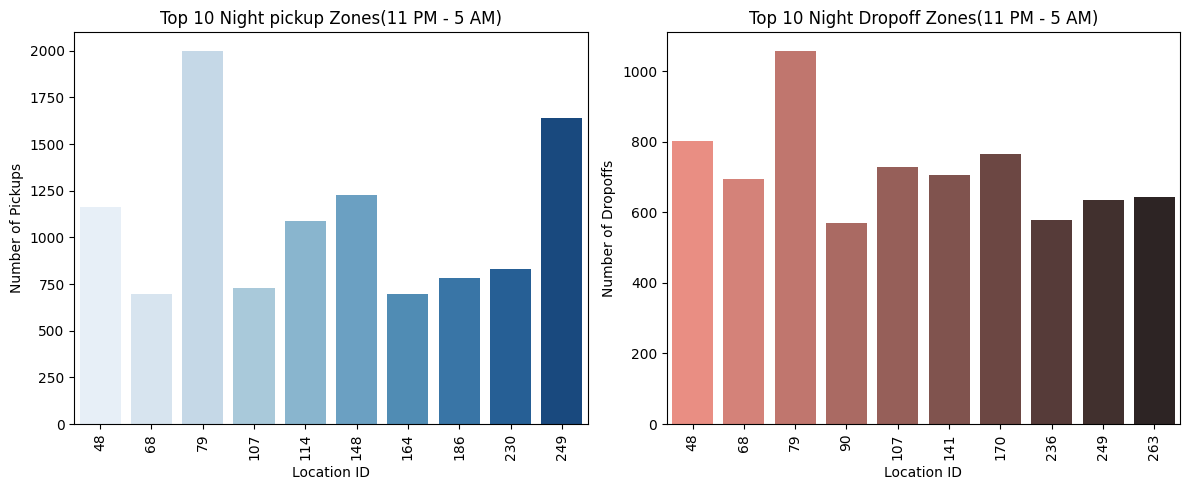

In [194]:
#Barplot showing top 10 night pickups
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=top_night_pickups['Pickup_zone'],y=top_night_pickups['Pickups'],palette = 'Blues')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.title('Top 10 Night pickup Zones(11 PM - 5 AM)')


#Barplot showing top 10 night dropoff
plt.subplot(1,2,2)
sns.barplot(x=top_night_dropoffs['Drop_off_zone'],y=top_night_dropoffs['Dropoffs'],palette = 'dark:salmon_r')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Number of Dropoffs')
plt.title('Top 10 Night Dropoff Zones(11 PM - 5 AM)')

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [197]:
# Filter for night hours (11 PM to 5 AM)
day_hours = df_new[(df_new['pickup_hour'] > 5) & (df_new['pickup_hour'] < 23)]

nighttime_revenue = night_hours['total_amount'].sum()
daytime_revenue = day_hours['total_amount'].sum()

revenue_share = pd.DataFrame({'Category':['Nighttime(11 PM - 5 AM)','Daytime(6 AM - 10 PM)'],
                  'Revenue' :[nighttime_revenue,daytime_revenue]})
revenue_share[revenue_share['Category'] == 'Nighttime(11 PM - 5 AM)']

Category    Revenue
0  Nighttime(11 PM - 5 AM)  511811.71

In [198]:
#Revenue % for nighttime
nighttime_revenue/(nighttime_revenue+daytime_revenue)

np.float64(0.11755631219898433)

In [199]:
#Revenue % for nighttime
daytime_revenue/(nighttime_revenue+daytime_revenue)

np.float64(0.8824436878010156)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [203]:
# Analyse the fare per mile per passenger for different passenger counts
#Caculate fare per mile per passenger 
df_new['fare_per_mile_per_passenger'] = df_new['fare_amount'] / (df_new['trip_distance'] * df_new['passenger_count'])
#Groupby the passenger count to find the mean of the fare per mile per passenger
fare_distribution = df_new.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_distribution

passenger_count  fare_per_mile_per_passenger
0              1.0                     8.416354
1              2.0                     4.274799
2              3.0                     2.845983
3              4.0                     2.326792
4              5.0                     1.598933
5              6.0                     1.346492

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [204]:
# Compare the average fare per mile for different days and for different times of the day
#calculate fare per mile
df_new['fare_per_mile']= df_new['fare_amount']/df_new['trip_distance']
#Groupby the pickup hour and find the mean of the fare per mile
hourly_fare_per_mile = df_new.groupby('pickup_hour')['fare_per_mile'].mean()
hourly_fare_per_mile

pickup_hour
0     7.052081
1     7.233337
2     7.390750
3     8.237116
4     6.300928
5     6.506392
6     7.576518
7     7.339523
8     8.133071
9     9.026128
10    9.028946
11    9.113478
12    9.151183
13    8.992530
14    9.203653
15    9.084655
16    9.114248
17    9.121740
18    8.744134
19    8.642438
20    7.571363
21    7.517107
22    7.609933
23    6.981380
Name: fare_per_mile, dtype: float64

In [205]:
#calculate the daily fare per mile by grouping the days of the week
daily_fare_per_mile = df_new.groupby('day_of_week')['fare_per_mile'].mean()

In [206]:
#reseting the index
daily_fare_per_mile_final = daily_fare_per_mile.reset_index()

In [207]:
#arrangin the data by the category
daily_fare_per_mile_final['day_of_week'] = pd.Categorical(daily_fare_per_mile_final['day_of_week'],categories=days_order,ordered=True)
daily_fare_per_mile_final.sort_values('day_of_week').reset_index(drop=True)

day_of_week  fare_per_mile
0      Monday       8.072993
1     Tuesday       8.714734
2   Wednesday       8.716156
3    Thursday       8.958686
4      Friday       8.249635
5    Saturday       8.123952
6      Sunday       8.076449

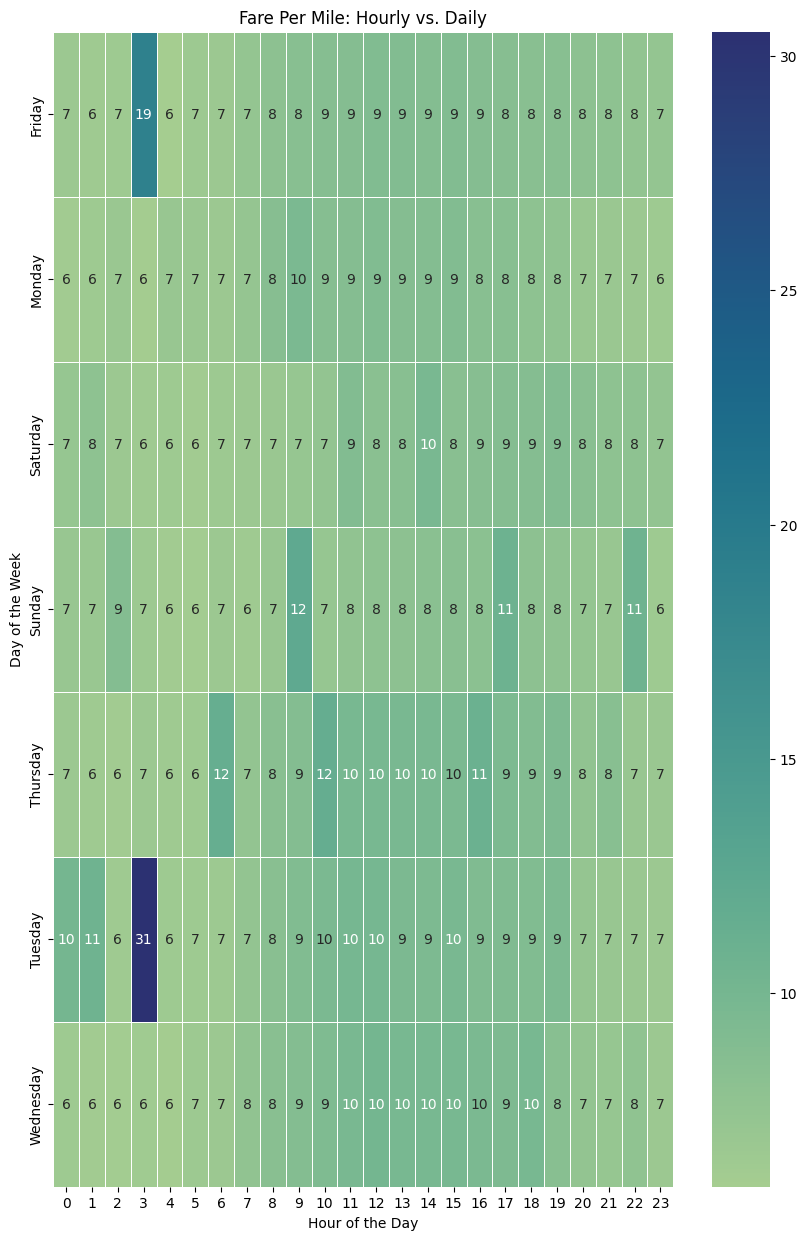

In [208]:
#heatmap showing the avg fare per mile by hours and the days
plt.figure(figsize=(10,15))
fare_map = df_new.pivot_table(values='fare_per_mile',index='day_of_week',columns='pickup_hour',aggfunc='mean')
sns.heatmap(fare_map,cmap='crest',annot=True,fmt='.0f',linewidths=0.4)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Fare Per Mile: Hourly vs. Daily')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [209]:
# Compare fare per mile for different vendors
#Calculating the fare per mile by grouping vendors and pickup hours.
vendor_fare_hourly = df_new.groupby(['VendorID','pickup_hour'])['fare_per_mile'].mean().reset_index()

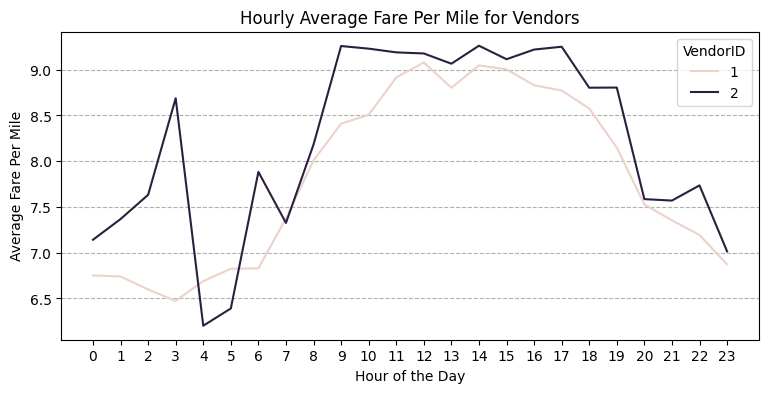

In [210]:
#Lineplot showing Hourly Average Fare Per Mile for Vendors
plt.figure(figsize=(9,4))
sns.lineplot(data=vendor_fare_hourly,x='pickup_hour',y='fare_per_mile',hue='VendorID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Per Mile')
plt.title('Hourly Average Fare Per Mile for Vendors')
plt.legend(title='VendorID')
plt.grid(True,axis='y',linestyle='--')
plt.xticks(range(0,24))
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [211]:
# Defining distance tiers
bins=[0,2,5,float('inf')]
labels=['0-2','2-5','5+']
df_new['distance_tier']=pd.cut(df_new['trip_distance'],bins=bins,labels=labels)
#Grouping vendor id, distance tier to calculate the mean of the fare per mile
vendor_fare_tiers = df_new.groupby(['VendorID','distance_tier'])['fare_per_mile'].mean().reset_index()
vendor_fare_tiers

VendorID distance_tier  fare_per_mile
0         1           0-2       9.296237
1         1           2-5       6.324034
2         1            5+       4.930366
3         2           0-2       9.864426
4         2           2-5       6.480226
5         2            5+       5.011950

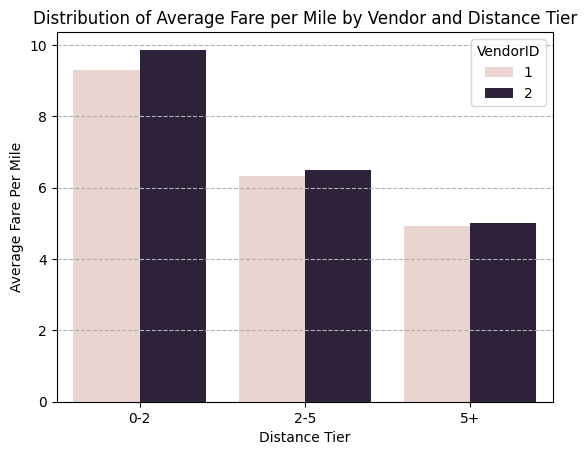

In [212]:
#Barplot showing Distribution of Average Fare per Mile by Vendor and Distance Tier
sns.barplot(data=vendor_fare_tiers,x='distance_tier',y='fare_per_mile',hue='VendorID')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare Per Mile')
plt.title('Distribution of Average Fare per Mile by Vendor and Distance Tier')
plt.legend(title='VendorID')
plt.grid(visible = True,linestyle='--',axis='y')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [213]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_new['tip_percentage'] = (df_new['tip_amount']) * 100 /df_new['fare_amount']

In [215]:
#Groupby trip distance to find the tip percentage
avg_tip_distance=df_new.groupby('trip_distance')['tip_percentage'].mean().reset_index()
avg_tip_distance.sort_values(by='tip_percentage',ascending=False)

trip_distance  tip_percentage
2             0.03       98.515315
4             0.05       58.988511
11            0.12       49.244326
9             0.10       47.240208
15            0.16       44.535565
..             ...             ...
677           6.78       17.450025
652           6.53       17.144115
567           5.68       17.087599
607           6.08       17.061063
685           6.86       16.472772

[692 rows x 2 columns]

In [216]:
#Groupby passenger count to find the tip percentage
avg_tip_passenger = df_new.groupby('passenger_count')['tip_percentage'].mean().reset_index()
avg_tip_passenger.sort_values(by='tip_percentage',ascending=False)

passenger_count  tip_percentage
3              4.0       26.419375
4              5.0       26.400406
0              1.0       26.272030
5              6.0       26.265508
2              3.0       26.240649
1              2.0       26.239786

In [217]:
#Groupby Pickup hour to find the tip percentage
avg_tip_time = df_new.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
avg_tip_time.sort_values(by='tip_percentage',ascending=False)

pickup_hour  tip_percentage
19           19       27.821597
18           18       27.731208
16           16       27.637710
17           17       27.613169
5             5       27.234754
21           21       26.636746
20           20       26.616265
4             4       26.583841
1             1       26.518375
3             3       26.383431
22           22       26.373138
2             2       26.332916
0             0       26.064772
23           23       26.057419
6             6       25.715925
10           10       25.684993
13           13       25.449194
11           11       25.413880
12           12       25.303842
14           14       25.298007
9             9       25.161933
15           15       25.057778
7             7       24.964592
8             8       24.960861

In [675]:
low_tip = df_new[df_new['tip_percentage'] < df_new['tip_percentage'].mean()]
low_tip.groupby(['trip_distance','passenger_count','pickup_hour'])['tip_percentage'].mean()

trip_distance  passenger_count  pickup_hour
0.01           1.0              0              22.859831
                                1              24.666667
                                3              24.443207
                                9              21.536599
                                12              0.333333
                                                 ...    
6.92           2.0              11             22.228412
                                21             23.154574
               3.0              12             22.416918
               5.0              12             16.655405
               6.0              8              13.927577
Name: tip_percentage, Length: 24986, dtype: float64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [218]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_new['tip_category']=pd.cut(df_new['tip_percentage'],bins=[0,10,25,100],labels=['Low Tip(<10%)','Medium Tip(10-25%)','High Tip(>25%)'])

In [219]:
distance_comparison=df_new.groupby('tip_category')['trip_distance'].mean().reset_index()
distance_comparison

tip_category  trip_distance
0       Low Tip(<10%)       2.582836
1  Medium Tip(10-25%)       2.603145
2      High Tip(>25%)       1.559820

In [220]:
pickuptime_comparison=df_new.groupby(['tip_category','pickup_hour']).size().unstack()
pickuptime_comparison

pickup_hour           0     1     2    3    4    5     6     7     8     9   \
tip_category                                                                  
Low Tip(<10%)        373   253   173  128   46   44   127   369   497   467   
Medium Tip(10-25%)  1735  1209   817  463  284  208   856  2000  3058  3432   
High Tip(>25%)      3408  2428  1525  969  441  409  1293  3003  4286  4712   

pickup_hour         ...    14    15    16    17    18    19    20    21    22  \
tip_category        ...                                                         
Low Tip(<10%)       ...   598   704   618   723   745   650   606   584   540   
Medium Tip(10-25%)  ...  4651  4678  3453  4012  4339  3808  3610  3612  3386   
High Tip(>25%)      ...  6118  6351  7775  9037  9891  8701  7478  7611  6743   

pickup_hour           23  
tip_category              
Low Tip(<10%)        507  
Medium Tip(10-25%)  2605  
High Tip(>25%)      4841  

[3 rows x 24 columns]

In [221]:

passenger_count_comparison=df_new.groupby('tip_category')['passenger_count'].mean().reset_index()
passenger_count_comparison

tip_category  passenger_count
0       Low Tip(<10%)         1.346015
1  Medium Tip(10-25%)         1.347863
2      High Tip(>25%)         1.354834

In [222]:
payment_comparison=df_new.groupby(['tip_category','payment_type']).size().unstack()
payment_comparison

payment_type             1  2  3  4     5
tip_category                             
Low Tip(<10%)        10504  1  1  0   323
Medium Tip(10-25%)   64819  0  0  1  2928
High Tip(>25%)      117788  4  0  2  1394

In [223]:
df_new['trip_speed'] = df_new['trip_distance']/df_new['trip_duration']
speed_comparison = df_new.groupby('tip_category')['trip_speed'].mean().reset_index()
speed_comparison

tip_category  trip_speed
0       Low Tip(<10%)   10.192085
1  Medium Tip(10-25%)    9.996554
2      High Tip(>25%)    9.600516

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [224]:
# See how passenger count varies across hours and days
#Calculate the count of passengers based on the pickup hour and the day of the week
passenger_per_hour = df_new.groupby('pickup_hour')['passenger_count'].mean()
passenger_per_day = df_new.groupby('day_of_week')['passenger_count'].mean()

In [225]:
#categorize the day of the week
passenger_per_day = passenger_per_day.reset_index()
passenger_per_day['day_of_week'] = pd.Categorical(passenger_per_day['day_of_week'],categories=days_order,ordered=True)
passenger_per_day.sort_values('day_of_week').reset_index(drop=True)

day_of_week  passenger_count
0      Monday         1.318126
1     Tuesday         1.293605
2   Wednesday         1.297963
3    Thursday         1.308824
4      Friday         1.372165
5    Saturday         1.451534
6      Sunday         1.438687

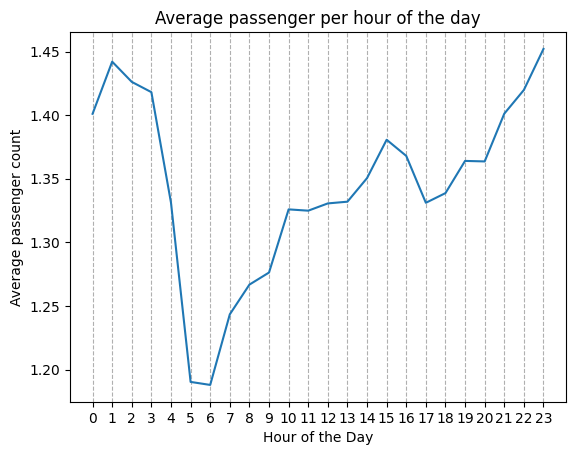

In [228]:
#Lineplot showing average passenger per hour of the day
sns.lineplot(x=passenger_per_hour.index,y=passenger_per_hour.values)
plt.title('Average passenger per hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average passenger count')
plt.xticks(range(0,24))
plt.grid(True,linestyle='--',axis='x')
plt.show()

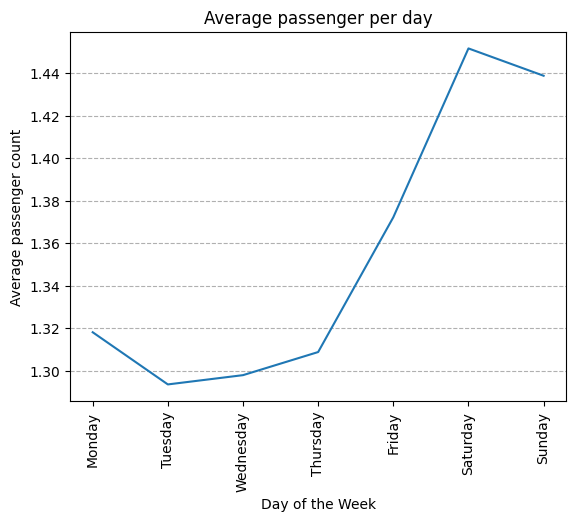

In [229]:
#Lineplot showing average passenger per day of the week
sns.lineplot(x=passenger_per_day['day_of_week'],y=passenger_per_day['passenger_count'])
plt.title('Average passenger per day')
plt.xlabel('Day of the Week')
plt.ylabel('Average passenger count')
plt.xticks(rotation=90)
plt.grid(True,linestyle='--',axis='y')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [230]:
# How does passenger count vary across zones
#Calculating the passenger count by grouping the Pickup locationID
passenger_per_zone = df_new.groupby('PULocationID')['passenger_count'].agg('sum').reset_index()

In [231]:
#Calculating the top and bottom zone by sorting the data in asc and desc order
top_zones = passenger_per_zone.sort_values(by='passenger_count',ascending=False).head(15)
bottom_zones = passenger_per_zone.sort_values(by='passenger_count',ascending=True).head(15)

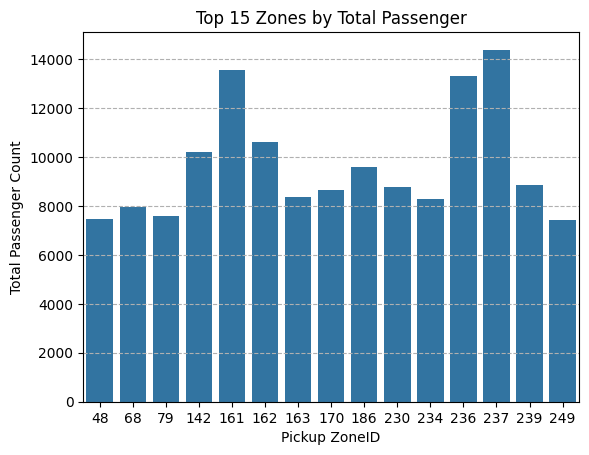

In [232]:
#Barplot showing the top 15 zones with total passenger
sns.barplot(data=top_zones,x=top_zones['PULocationID'],y=top_zones['passenger_count'])
plt.xlabel('Pickup ZoneID')
plt.ylabel('Total Passenger Count')
plt.title('Top 15 Zones by Total Passenger')
plt.grid(visible = True,linestyle='--',axis='y')
plt.show()

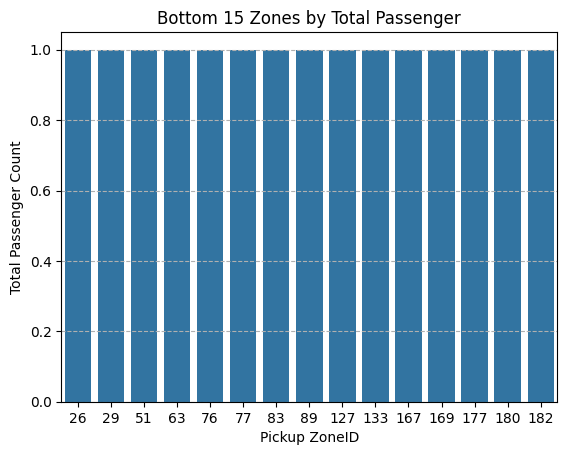

In [234]:
#Barplot showing the bottom 15 zones with total passenger
sns.barplot(data=bottom_zones,x=bottom_zones['PULocationID'],y=bottom_zones['passenger_count'])
plt.xlabel('Pickup ZoneID')
plt.ylabel('Total Passenger Count')
plt.title('Bottom 15 Zones by Total Passenger')
plt.grid(visible = True,linestyle='--',axis='y')
plt.show()

In [235]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
#grouped the data on the pickup location id, and calculated the mean of passenger count
zone_avg_passenger_count = df_new.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_avg_passenger_count.rename(columns={'passenger_count':'avg_passenger_count'},inplace=True)

In [236]:
#Merged the above calculated data in zones, on right merge
zones_with_trips = zones.merge(zone_avg_passenger_count, left_on = 'LocationID',right_on = 'PULocationID',how='left')

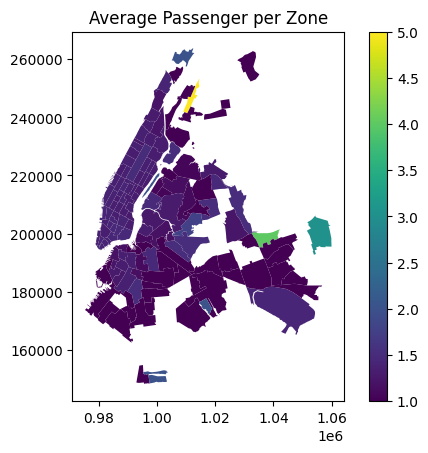

In [237]:
#plotted the map on the column average passenger count
zones_with_trips.plot(column = 'avg_passenger_count', legend = True)
plt.title('Average Passenger per Zone')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [238]:
# How often is each surcharge applied?

In [246]:
df_new['total_extra'] = df_new['extra'] + df_new['mta_tax'] + df_new['improvement_surcharge'] + df_new['congestion_surcharge'] + df_new['Airport_fee']

In [ ]:
#surcharge by pickup zone
surcharge_by_pickup = df_new.groupby('PULocationID')['total_extra'].mean().reset_index()
surcharge_by_pickup.rename(columns={'total_extra':'avg_extra_charge'},inplace=True)
surcharge_by_pickup = surcharge_by_pickup.sort_values(by='avg_extra_charge',ascending=False)


In [255]:
#surcharge by dropoff zone
surcharge_by_dropoff = df_new.groupby('DOLocationID')['total_extra'].mean().reset_index()
surcharge_by_dropoff.rename(columns={'total_extra':'avg_extra_charge'},inplace=True)
surcharge_by_dropoff = surcharge_by_dropoff.sort_values(by='avg_extra_charge',ascending=False)


In [252]:
#surcharge by hour
surcharge_by_hour = df_new.groupby('pickup_hour')['total_extra'].mean().reset_index()

In [253]:
surcharge_by_pickup.head(5)

PULocationID  avg_extra_charge
66            138          9.196131
34             70          7.150000
9              28          6.500000
80            161          5.580086
121           230          5.529673

In [256]:
surcharge_by_dropoff.head(5)

DOLocationID  avg_extra_charge
114           171          9.541667
31             56          9.321429
103           160          9.250000
29             53          8.964286
72            121          8.850000

In [257]:
surcharge_by_hour

pickup_hour  total_extra
0             0     5.510448
1             1     5.451501
2             2     5.532566
3             3     5.445134
4             4     5.346636
5             5     5.489653
6             6     4.680720
7             7     4.628885
8             8     4.623926
9             9     4.633051
10           10     4.650237
11           11     4.641436
12           12     4.630421
13           13     4.641471
14           14     4.633367
15           15     4.664853
16           16     6.307203
17           17     6.427900
18           18     6.455366
19           19     6.396920
20           20     5.601569
21           21     5.550656
22           22     5.537141
23           23     5.536675

In [240]:
#create a df with all the surcharges and transpose it
surcharge_counts = pd.DataFrame({
    'extra':(df_new['extra'] > 0).sum(),
    'mta_tax' :(df_new['mta_tax'] > 0).sum(),
    'improvement_surcharge':(df_new['improvement_surcharge'] > 0).sum(),
    'congestion_surcharge' : (df_new['congestion_surcharge'] > 0).sum(),
    'Airport_fee' : (df_new['Airport_fee'] > 0).sum()
},index=['Trips with surcharges']).T

In [241]:
#caculate surcharge share percentage
surcharge_counts['Percentage'] = (surcharge_counts['Trips with surcharges'] * 100) / len(df_new)

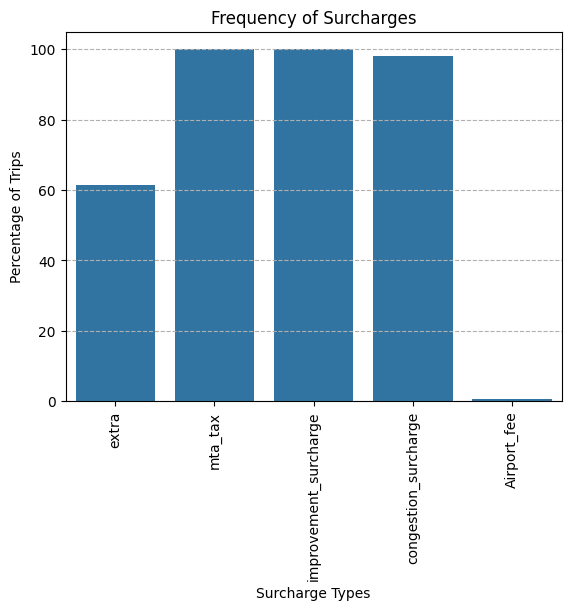

In [242]:
#Barplot showing how frequently surcharges apply
sns.barplot(x=surcharge_counts.index,y=surcharge_counts['Percentage'])
plt.xlabel('Surcharge Types')
plt.ylabel('Percentage of Trips')
plt.title('Frequency of Surcharges')
plt.grid(True,linestyle='--',axis='y')
plt.xticks(rotation=90)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

-	Use historical data to look for the slowest speed trips to reroute the cabs away from the congestion-prone areas, which can reduce the delays, and improving fare-per-mile-efficiency.
-	Introduce promotional offers so that long distance riders also take part in the tipping, as we can see that short distance passengers have tip percentage.
-   Based on the analysis, the slowest routes were 113-113,209-232,164-100,209-25,41-41. Cabs can try to take the alternate fastest route.
-   More and more cabs can be dispatched on the Upper East Side South, Midtown Center, Upper East Side North like zones as these are high demands.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

-	Relocate more cabs, between 6 AM – 10 PM, on the weekdays to high-demand zones, as this may be the login and logout time for the employees. 
-	The cabs can be shifted to the residential areas during the morning time as the employees commute to their respective workplace, and then the cabs can be relocated to the workplace zones to meet the high-demand. Real-time demand forecasting will be more helpful to resolve this. 
-   Upper East Side South, Midtown Center, Upper East Side North like zones as these are high demands, 
during the day time in the weekdays and the night time in the weekdays, especially before 5 AM and after 6 PM and during the months like October-December and March-June.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

-	Adjust fare per mile for short-distance trips as we can see that the fare per mile is higher for short distance, it will attract more passengers for shorter distance and will definitely increase the tipping percentage.
-	Revenue share for nighttime is high, we can have more cabs which can reduce the average waiting time for a passenger.
-	On weekends, there is a good average passenger count, we can hike the fare amount a little bit in the entertainment complex zones, and offer a discount as well. 
-   The fare amount for short distance trip is too high, as compared to the low distance. 
-   We can eventually increase the fare per mile for more than 5 passenger counts.
-   We can see that the credit card users pay the tip amount more frequently, we can come back up more credit card offers on pay, so that the drivers are also satisfied.